# Importing Libraries

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for pre-processing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

# For Machine learning Model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For Evaluation
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [3]:
# Load the dataset
df = pd.read_csv('Drivers_Population_Census.csv')
df.head()

,license_type,age_group,nationality,gender,licenses_num
0,Registration,30-40,استراليا,FEMALE,1
1,Registration,20-30,افغانستان,MALE,1
2,Registration,40-60,الامارات,MALE,1
3,Registration,40-60,الامارات,MALE,2
4,Registration,40-60,الامارات,MALE,1


# Exploring Statistical Analysis

In [4]:
# Display basic statistics and information about the dataset
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2808 entries, 0 to 2807
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   license_type  2808 non-null   object
 1   age_group     2808 non-null   object
 2   nationality   2808 non-null   object
 3   gender        2808 non-null   object
 4   licenses_num  2808 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 109.8+ KB


None

In [5]:
# Check for missing values
print(df.isnull().sum())

license_type    0
age_group       0
nationality     0
gender          0
licenses_num    0
dtype: int64


# Visualization & EDA (Exploratory Data Analysis)

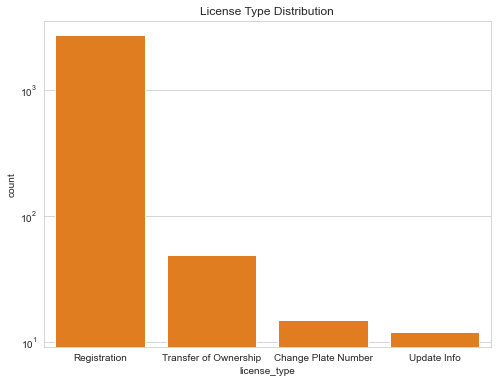

In [8]:
# License Type distribution
sns.set_style('whitegrid')
colors = sns.color_palette("bright")
plt.figure(figsize=(8, 6))
sns.countplot(x='license_type', data=df, color = colors[1])
plt.title('License Type Distribution')
plt.yscale('log')
plt.show()

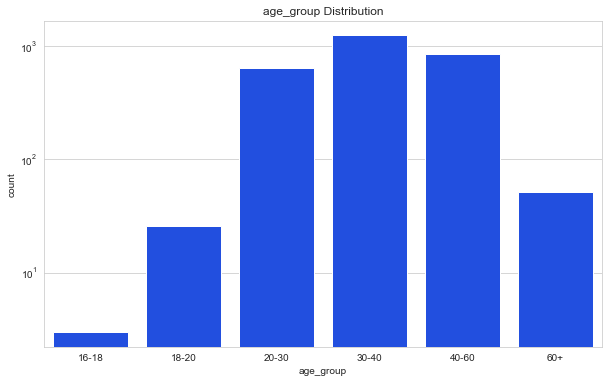

In [10]:
# age_group distribution
df1 = df.sort_values('age_group')
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=df1, color= colors[0])
plt.title('age_group Distribution')
plt.yscale('log')
plt.show()

####  Replacing Arabic with english

In [11]:
countries_urdu = ['استراليا', 'افغانستان', 'الامارات', 'الجزائر', 'الصين', 'العراق',
       'الفلبين', 'المانيا', 'المغرب', 'المملكه المتحدة', 'الهند',
       'اوغنده', 'اوكرانيا', 'ايران', 'باكستان', 'بنغلاديش', 'تركيا',
       'دومينيكا', 'روسيا', 'رومانيا', 'سانت كيتس ونيفيس', 'سوريا',
       'سويسرا', 'سيريلانكا', 'فرنسا', 'كندا', 'كوريا الجنوبيه',
       'اثيوبيا', 'الاردن', 'الولايات المتحدة', 'اليمن', 'اليونان',
       'ايرلندا', 'بولندا', 'تايلند', 'جنوب افريقيا', 'جورجيا', 'السويد',
       'ايطاليا', 'Vanuatu', 'اذربيجان', 'البرتغال', 'السودان', 'اليابان',
       'اوزباكستان', 'تركمانستان', 'تنزانيا', 'جنوب السودان', 'اسرائيل',
       'البرازيل', 'النمسا', 'جزر القمر', 'الكويت', 'المكسيك', 'بلجيكا',
       'تونس', 'اسبانيا', 'غانا', 'فلسطين', 'لاتيفيا', 'لبنان', 'مصر',
       'قيرغيزستان', 'المجر', 'روسيا البيضاء', 'زيمبابوي', 'سنغافوره',
       'قبرص', 'كازاخستان', 'النرويج', 'بليز', 'الكاميرون', 'صربيا',
       'كرواتيا', 'مملكة البحرين', 'الارجنتين', 'جرينادا', 'نيجيريا',
       'هونج كونج', 'الدانمارك', 'الدومينيكان', 'زامبيا', 'طاجكستان',
       'موريشيوس', 'هولندا', 'نيبال', 'نيوزيلندا', 'مالطا', 'عمان',
       'مقدونيا', 'فنزويلا', 'ماليزيا', 'بروندي', 'سلوفاكيا', 'اندونيسيا',
       'ارمينيا', 'السعوديه', 'غابون', 'التشيك', 'بيرو',
       'جمهورية الكونغو الديمقراطية', 'تشيلي', 'جمهورية ماينمار',
       'الصومال', 'السنغال', 'كينيا', 'ارتيريا', 'ليتوانيا', 'فيتنام',
       'كولومبيا', 'ليبيا', 'مالي', 'قطر', 'فنلندا', 'كمبوديا',
       'سلوفينيا']

countries_english = ['Australia', 'Afghanistan', 'United Arab Emirates', 'Algeria', 'China', 'Iraq',
       'Philippines', 'Germany', 'Morocco', 'United Kingdom', 'India',
       'Uganda', 'Ukraine', 'Iran', 'Pakistan', 'Bangladesh', 'Turkey',
       'Dominica', 'Russia', 'Romania', 'Saint Kitts and Nevis', 'Syria',
       'Switzerland', 'Sri Lanka', 'France', 'Canada', 'South Korea',
       'Ethiopia', 'Jordan', 'United States', 'Yemen', 'Greece',
       'Ireland', 'Poland', 'Thailand', 'South Africa', 'Georgia', 'Sweden',
       'Italy', 'Vanuatu', 'Azerbaijan', 'Portugal', 'Sudan', 'Japan',
       'Uzbekistan', 'Turkmenistan', 'Tanzania', 'South Sudan', 'Israel',
       'Brazil', 'Austria', 'Comoros', 'Kuwait', 'Mexico', 'Belgium',
       'Tunisia', 'Spain', 'Ghana', 'Palestine', 'Latvia', 'Lebanon', 'Egypt',
       'Kyrgyzstan', 'Hungary', 'Belarus', 'Zimbabwe', 'Singapore',
       'Cyprus', 'Kazakhstan', 'Norway', 'Belize', 'Cameroon', 'Serbia',
       'Croatia', 'Kingdom of Bahrain', 'Argentina', 'Grenada', 'Nigeria',
       'Hong Kong', 'Denmark', 'Dominican Republic', 'Zambia', 'Tajikistan',
       'Mauritius', 'Netherlands', 'Nepal', 'New Zealand', 'Malta', 'Oman',
       'Macedonia', 'Venezuela', 'Malaysia', 'Burundi', 'Slovakia', 'Indonesia',
       'Armenia', 'Saudi Arabia', 'Gabon', 'Czech Republic', 'Peru',
       'Democratic Republic of the Congo', 'Chile', 'Republic of Myanmar',
       'Somalia', 'Senegal', 'Kenya', 'Eritrea', 'Lithuania', 'Vietnam',
       'Colombia', 'Libya', 'Mali', 'Qatar', 'Finland', 'Cambodia',
       'Slovenia']

# Creating a dictionary with Urdu names as keys and English names as values
country_translate  = dict(zip(countries_urdu, countries_english))
df['nationality'] = df['nationality'].replace(country_translate)

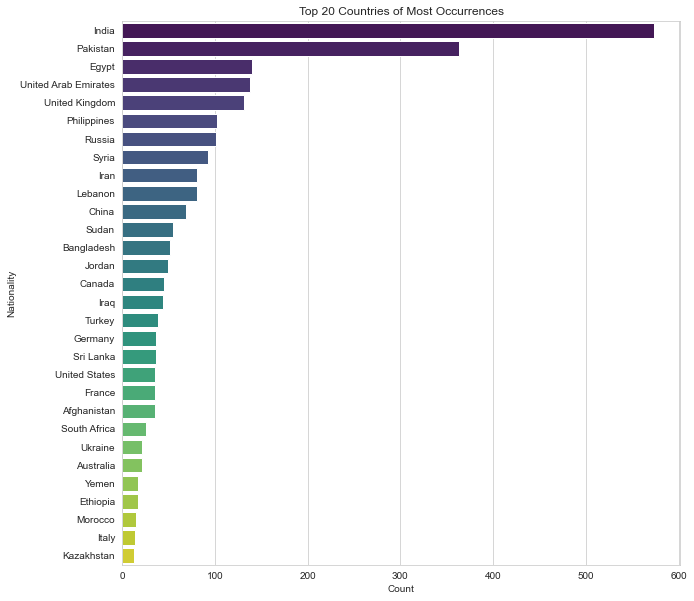

In [12]:
# Nationality Distributon of top 20 most occurent Countries
top_countries = df['nationality'].value_counts().nlargest(30)

# Plotting the count plot
plt.figure(figsize=(10, 10))
sns.countplot(y='nationality', data=df, order=top_countries.index, palette='viridis')
plt.title('Top 20 Countries of Most Occurrences')
plt.xlabel('Count')
plt.ylabel('Nationality')
plt.show()

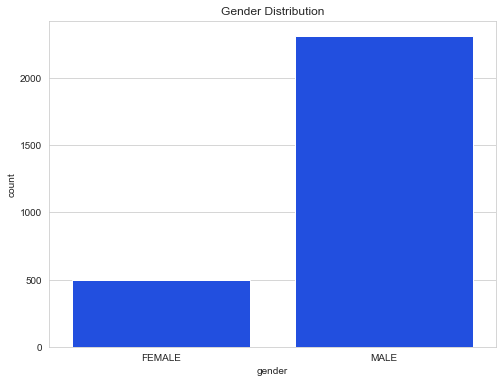

In [15]:
# Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df, color = colors[0])
plt.title('Gender Distribution')
plt.show()

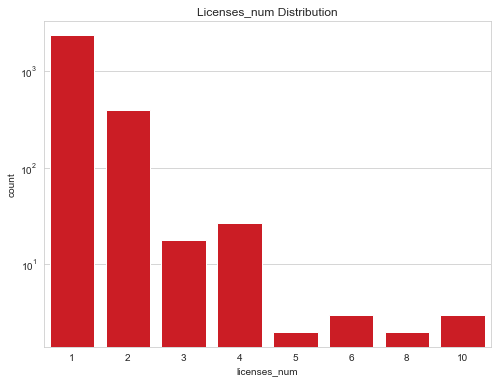

In [16]:
# Licenses_num Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='licenses_num', data=df,color = colors[3])
plt.title('Licenses_num Distribution')
plt.yscale('log')
plt.show()

## Preprocessing

###  1- One Hot Encoding

In [17]:
categorical_columns = ['age_group', 'gender']

In [19]:
# Apply One-Hot Encoding
encoder = OneHotEncoder(sparse=False,drop='first')
encoded_data = encoder.fit_transform(df[categorical_columns])

# Merge with the Original DataFrame
df_encoded = pd.concat([df, pd.DataFrame(encoded_data, columns=encoder.get_feature_names(categorical_columns))], axis=1)

# Drop Original Categorical Columns (Optional)
df_encoded = df_encoded.drop(categorical_columns, axis=1)

### 2- Label Encoder

In [20]:
# Implementing label Encoder
label_encoder_nationality = LabelEncoder()
label_encoder_license = LabelEncoder()
# Fit and transform 'nationality' column
df_encoded['nationality'] = label_encoder_nationality.fit_transform(df['nationality'])

# Fit and transform 'license_type' column
df_encoded['license_type'] = label_encoder_license.fit_transform(df['license_type'])

In [21]:
# getting features and target colomn
X = df_encoded.drop('license_type',axis=1)
y = df_encoded['license_type']
size = max(y.value_counts())
y.value_counts()

1    2732
2      49
0      15
3      12
Name: license_type, dtype: int64

### Over Sampling

In [23]:
smote = SMOTE(sampling_strategy={3:size, 2:size,0:size})
X_sm, y_sm = smote.fit_resample(X,y)
X_sm.shape,y_sm.value_counts()

((10928, 8),
 1    2732
 2    2732
 0    2732
 3    2732
 Name: license_type, dtype: int64)

#### Getting Class Names

In [95]:
class_1, class_2, class_3, class_4 = tuple(label_encoder_license.classes_)

In [98]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42,stratify=y_sm)

### Scaling the data

In [99]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Evaluation Function

In [118]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model_name):
    # Print model evaluation to predicted result
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n")
    plt.figure(figsize=(7,6))
    sns.heatmap(confusion_matrix(y_test_set, predictions), annot=True, fmt='g',cmap='viridis', xticklabels =  [class_1, class_2, class_3, class_4], yticklabels =  [class_1, class_2, class_3, class_4])
    plt.tight_layout()
    plt.xlabel('predicted')
    plt.ylabel('Actual')
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results

### KNN

========== KNN Classifier ==========

Accuracy on validation set: 0.7969

Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       547
           1       0.77      0.77      0.77       546
           2       0.80      0.63      0.70       547
           3       0.81      0.89      0.85       546

    accuracy                           0.80      2186
   macro avg       0.80      0.80      0.79      2186
weighted avg       0.80      0.80      0.79      2186


Confusion Matrix : 



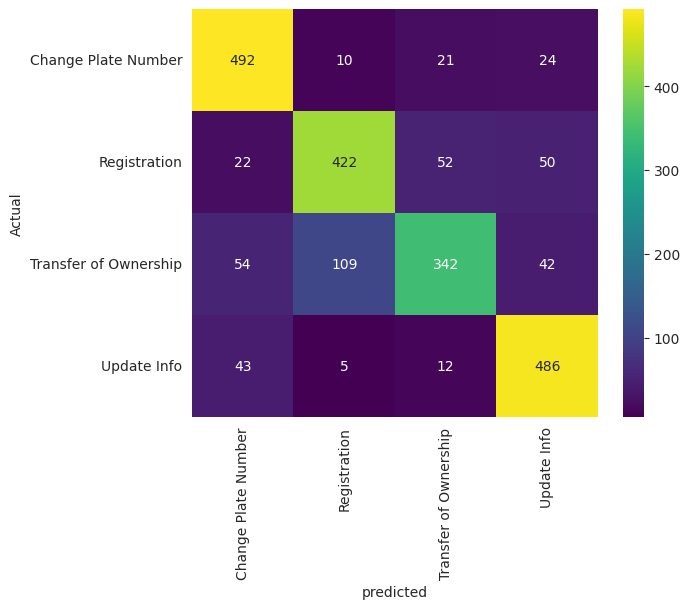

In [123]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
pred_knn = knn_model.predict(X_test)
results_knn = modelEvaluation(pred_knn, y_test, 'KNN Classifier')

### Decision Tree

#### Hyper parameter Tuning

In [124]:

dt_model = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Creating the GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='f1')

# Fitting the grid search on the data
grid_search.fit(X_train, y_train)

# Printing the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


========== Decision tree ==========

Accuracy on validation set: 0.8298

Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.89      0.87       547
           1       0.85      0.80      0.82       546
           2       0.82      0.76      0.79       547
           3       0.81      0.87      0.84       546

    accuracy                           0.83      2186
   macro avg       0.83      0.83      0.83      2186
weighted avg       0.83      0.83      0.83      2186


Confusion Matrix : 



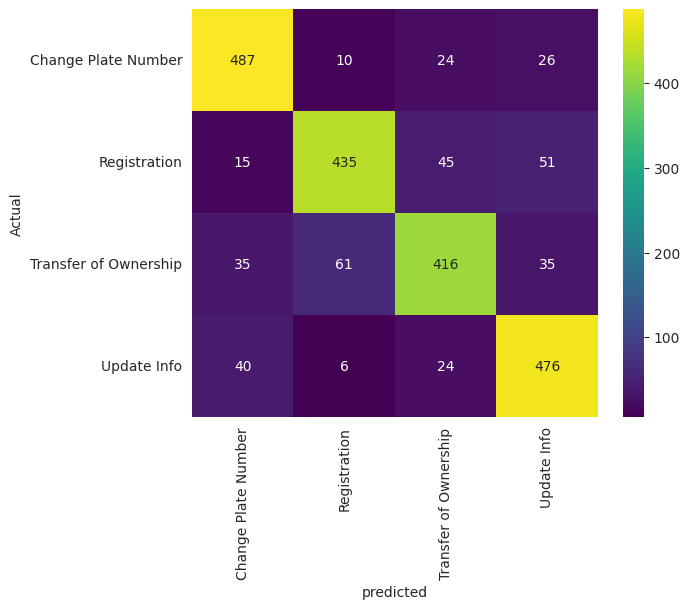

In [125]:
# geting the best model
best_dt_model = grid_search.best_estimator_

# Making predictions on the test set
pred_dt = best_dt_model.predict(X_test)
result_dt = modelEvaluation(pred_dt, y_test, 'Decision tree')

### Random Forest

#### Hyper Parametre Tuning

In [126]:
# Creating a Random Forest classifier
rf_model = RandomForestClassifier()

# Defining the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 30],
    'min_samples_leaf': [1, 2, 4],
}

# Creating the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search on the data
grid_search.fit(X_train, y_train)

# Printing the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1}


========== Random Forest ==========

Accuracy on validation set: 0.8522

Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       547
           1       0.86      0.79      0.82       546
           2       0.86      0.80      0.83       547
           3       0.83      0.90      0.86       546

    accuracy                           0.85      2186
   macro avg       0.85      0.85      0.85      2186
weighted avg       0.85      0.85      0.85      2186


Confusion Matrix : 



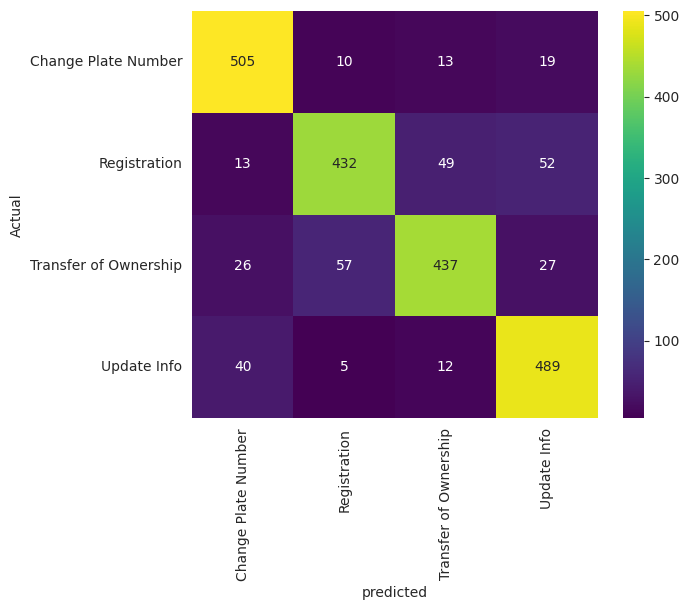

In [127]:
# Getting the best model
best_rf_model = grid_search.best_estimator_

# Making predictions on the test set
pred_rf = best_rf_model.predict(X_test)
result_rf = modelEvaluation(pred_rf, y_test, 'Random Forest')

In [129]:
# showing all models result
dic = {
    'Metrics':['accuracy','precision','recall','f1-score'],
    'KNN': results_knn,
    'Decision tree' : result_dt,
    'Random Forest' : result_rf,
}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df, headers = 'keys', tablefmt = 'psql'))

+-----------+----------+-----------------+-----------------+
| Metrics   |      KNN |   Decision tree |   Random Forest |
|-----------+----------+-----------------+-----------------|
| accuracy  | 0.796889 |        0.829826 |        0.852242 |
| precision | 0.796594 |        0.830111 |        0.852526 |
| recall    | 0.796921 |        0.82983  |        0.852233 |
| f1-score  | 0.792896 |        0.82906  |        0.851289 |
+-----------+----------+-----------------+-----------------+


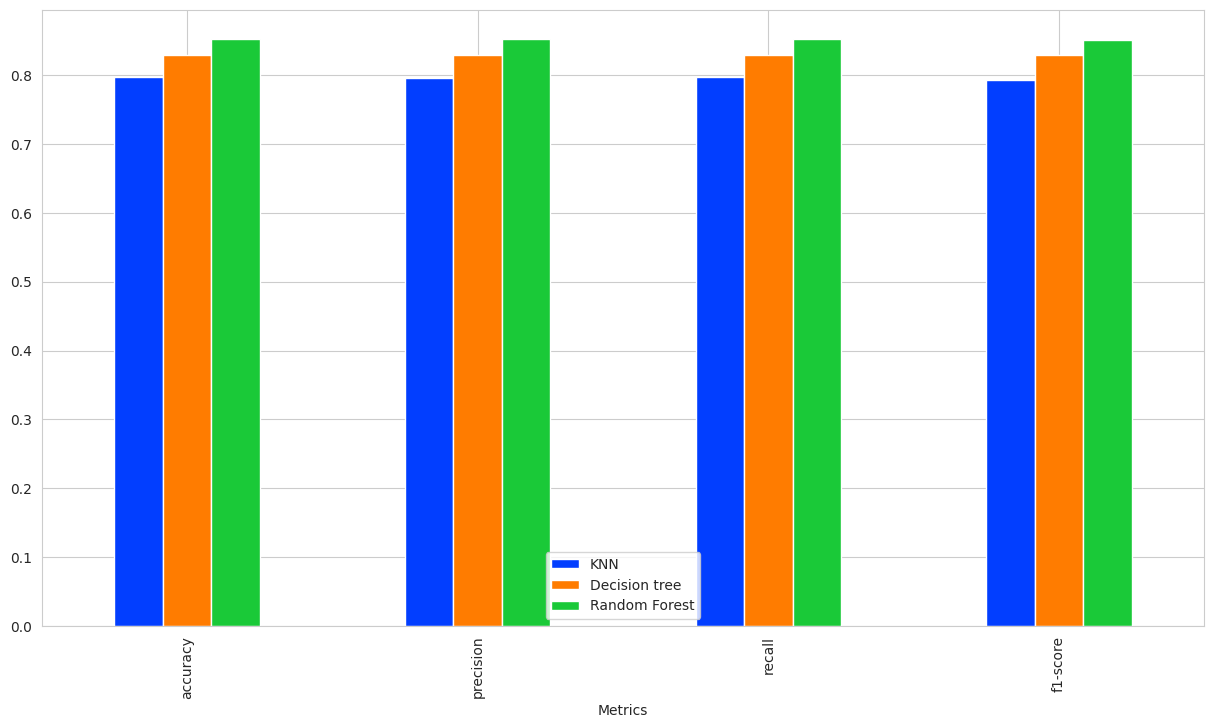

In [130]:
metrics_df.plot(kind='bar', figsize=(15,8), color = colors)
plt.legend(loc='lower center')
plt.show()